In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import poppy
from poppy.kolmogorov import kolmogorov
from poppy.zernike import zernike

In [138]:
dimension = 150;

In [139]:
#generate a phase mask using the turbulence module 
phase_mask = kolmogorov(dimension)

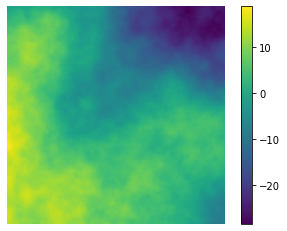

In [185]:
plt.imshow(phase_mask)
plt.colorbar()
plt.axis('off')
plt.show()

In [183]:
poly = zernike(4, 2, npix=dimension, outside = 0)

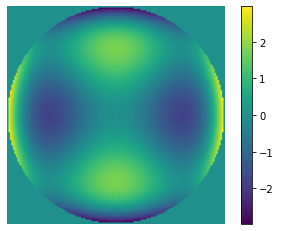

In [184]:
plt.imshow(poly)
plt.colorbar()
plt.axis('off')
plt.show()

In [34]:
def matrix_inner_product(a,b):
    A = a
    B = np.transpose(b)
    AB = np.matmul(A,B)
    ip = np.trace(AB)
    return(ip)

In [158]:
M = 10;
N = 10;
inner_products = np.zeros((N,M));

for m in range(M):
    for n in range(N):
        if n<=m:
            val = np.nan
        else:
            poly = zernike(n,m, npix=dimension, outside = 0)
            val = matrix_inner_product(poly,phase_mask)
            if val == 0:
                val = np.nan
        inner_products[n,m] = np.abs(val)
        


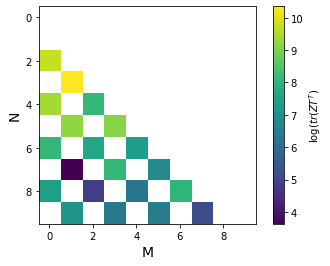

In [182]:
plt.imshow(np.log(inner_products))
plt.colorbar(label = '$\log(tr(Z T^T)$')
plt.ylabel('N',fontsize = 14)
plt.xlabel('M',fontsize =14)
plt.show()


In [163]:
samps = 100;
stats =  np.zeros((samps,N,M))

for s in range(samps):
    inner_products = np.zeros((N,M));
    phase_mask = kolmogorov(dimension)
    for m in range(M):
        for n in range(N):
            if n<=m:
                val = np.nan
            else:
                poly = zernike(n,m, npix=dimension, outside = 0)
                val = matrix_inner_product(poly,phase_mask)
                if val == 0:
                    val = np.nan
            inner_products[n,m] = np.abs(val)
    stats[s] = inner_products

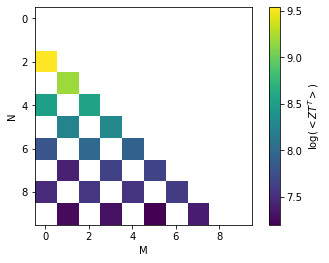

In [171]:
plt.imshow(np.mean(np.log(stats),axis =0))
plt.colorbar(label = '$\log(< Z T^T >)$')
plt.ylabel('N')
plt.xlabel('M')
plt.show()
